# Train Validation Visualization

This notebook takes a .csv file from a DDNN train log. The .csv file is loaded into pandas dataframe and visualized using seaborn and matplotlib  

## The setup

This setup has 5 MobileNetV2 device models pretrained on ImageNet and a ResNet152 edge model not pretrained. The device models feature extraction base are forzen, hence only the classifier is trained. All layers of the edge model is trained.

## Conclusion

Even with heavy image augmentation the Pascal VOC is too sparse a data set to properly train the ResNet edge model, that clearly overfits to the training data. 

Next, (1) pretrained imagenet weight for edge model, (2) even heavier augmentation, (3) training on a dense dataset e.g. imagenet first. 

In [2]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [50]:
df = pd.read_csv('../DDNN/logging/train_data_branchy.csv')
df.head()

,,Unnamed: 0,exit-0-train-loss,exit-1-train-loss,exit-2-train-loss,exit-3-train-loss,exit-0-train-accuracy,exit-1-train-accuracy,exit-2-train-accuracy,exit-3-train-accuracy,exit-0-test-loss,exit-1-test-loss,exit-2-test-loss,exit-3-test-loss,exit-0-test-accuracy,exit-1-test-accuracy,exit-2-test-accuracy,exit-3-test-accuracy
0,2.262478,2.258694,2.235238,0.333332,0.166640,0.201657,0.354566,0.906321,138.036617,2.231655,2.212907,2.112865,0.052137,0.278,0.356,0.594,0.976,8.605449
1,2.177655,2.131214,1.814668,0.214797,0.253656,0.320523,0.530468,0.931508,140.355039,2.113302,1.990986,1.237425,0.097122,0.308,0.344,0.622,0.966,9.084436
2,2.087281,1.938443,1.158304,0.213739,0.279981,0.361310,0.670783,0.930858,142.444795,1.998169,1.772234,0.749501,0.097881,0.342,0.386,0.824,0.972,8.753238
3,1.985581,1.747525,0.784727,0.179816,0.319548,0.415421,0.780224,0.940526,138.679265,1.868245,1.554772,0.496544,0.103083,0.356,0.446,0.874,0.968,9.219148
4,1.893272,1.597672,0.594316,0.169281,0.351479,0.457507,0.836529,0.945564,143.242798,1.747862,1.366996,0.382072,0.130407,0.368,0.522,0.910,0.960,9.152348


In [19]:
#palette = sns.color_palette("mako_r", 6)
legend = [
    'exit-0', 
    'exit-1', 
    'exit-2',
    'exit-3'
]
train_loss = [
    df['exit-0-train-loss'], 
    df['exit-1-train-loss'],
    df['exit-2-train-loss'],
    df['exit-3-train-loss']
]
train_acc = [
    df['exit-0-train-accuracy'], 
    df['exit-1-train-accuracy'],
    df['exit-2-train-accuracy'],
    df['exit-3-train-accuracy']
]
test_loss = [
    df['exit-0-test-loss'], 
    df['exit-1-test-loss'],
    df['exit-2-test-loss'],
    df['exit-3-test-loss']
]
test_acc = [
    df['exit-0-test-accuracy'], 
    df['exit-1-test-accuracy'],
    df['exit-2-test-accuracy'],
    df['exit-3-test-accuracy']
]
train_time = [
    df['exit-0-train-time'], 
    df['exit-1-train-time'],
    df['exit-2-train-time'],
    df['exit-3-train-time']
]
test_time = [
    df['exit-0-test-time'], 
    df['exit-1-test-time'],
    df['exit-2-test-time'],
    df['exit-3-test-time']
]

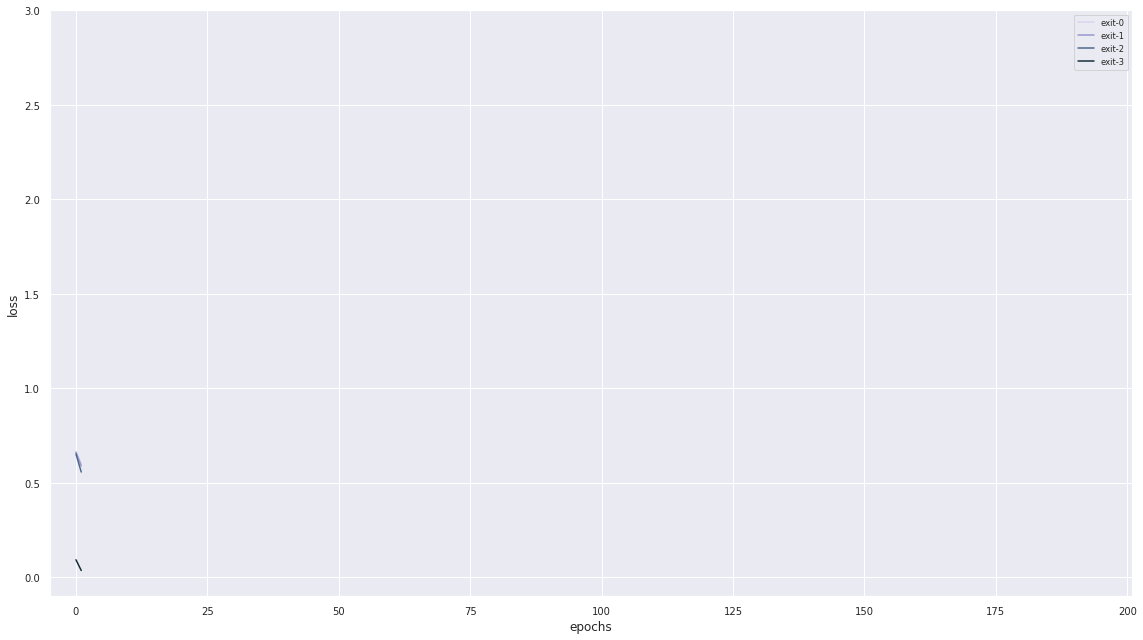

In [14]:
fig = plt.figure(figsize=(16,9))
ax = sns.lineplot(data=train_loss,
                  palette="ch:2.5,.25", 
                  dashes=False)


#ax.set(xlabel='epochs', ylabel='loss')
plt.xlabel('epochs', fontsize='large')
plt.ylabel('loss', fontsize='large')
plt.tick_params(labelsize='medium')
plt.legend(legend, fontsize='small')
plt.xlim([-5, 201])
plt.ylim([-0.1, 3])
plt.tight_layout()
plt.savefig('BResNet_train_loss_VOC.png')
plt.show()

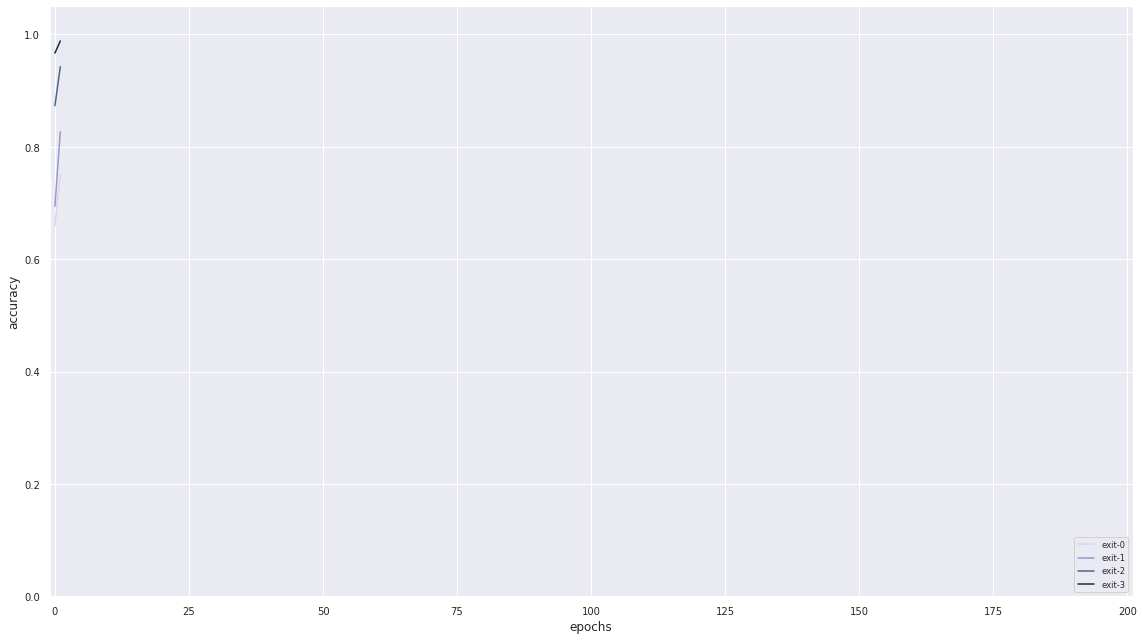

In [15]:
fig = plt.figure(figsize=(16,9))
ax = sns.lineplot(data=train_acc,
                  palette="ch:2.5,.25", 
                  dashes=False)


plt.xlabel('epochs', fontsize='large')
plt.ylabel('accuracy', fontsize='large')
plt.tick_params(labelsize='medium')
plt.legend(legend, fontsize='small', loc='lower right')
plt.xlim([-1, 201])
plt.ylim([0, 1.05])
#plt.title('Train accuracy')
plt.tight_layout()
plt.savefig('BResNet_train_acc_VOC.png')
plt.show()

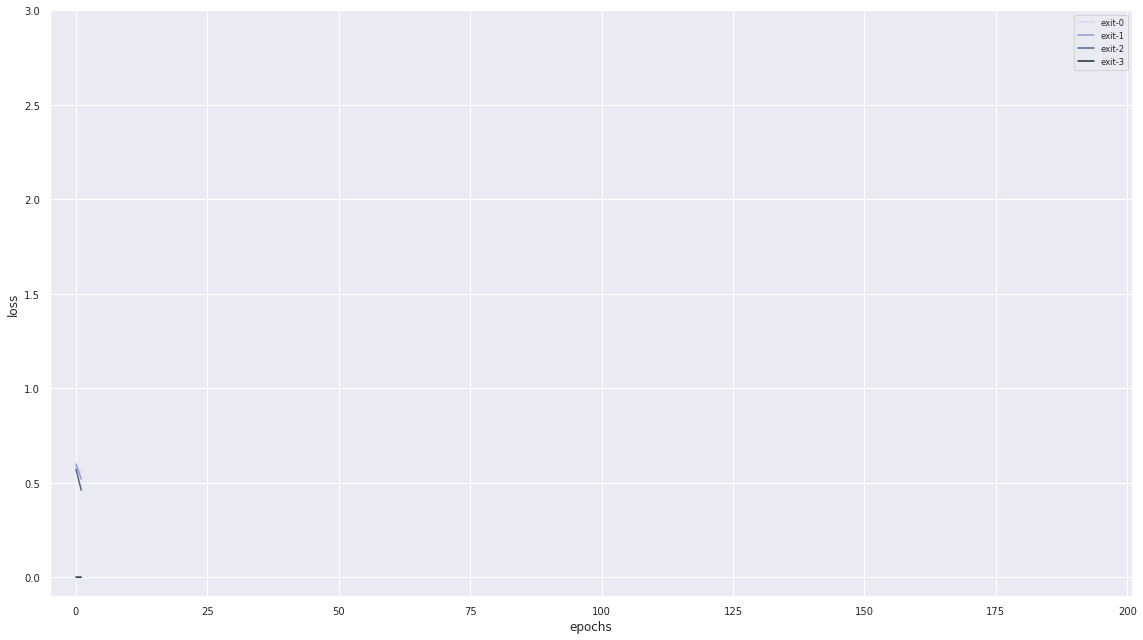

In [16]:
fig = plt.figure(figsize=(16,9))
ax = sns.lineplot(data=test_loss, 
                  palette="ch:2.5,.25", 
                  dashes=False)


plt.xlabel('epochs', fontsize='large')
plt.ylabel('loss', fontsize='large')
plt.tick_params(labelsize='medium')
plt.legend(legend, fontsize='small')
plt.xlim([-5, 201])
plt.ylim([-0.1, 3])
#plt.title('Test loss')
plt.tight_layout()
plt.savefig('BResNet_test_loss_VOC.png')
plt.show()

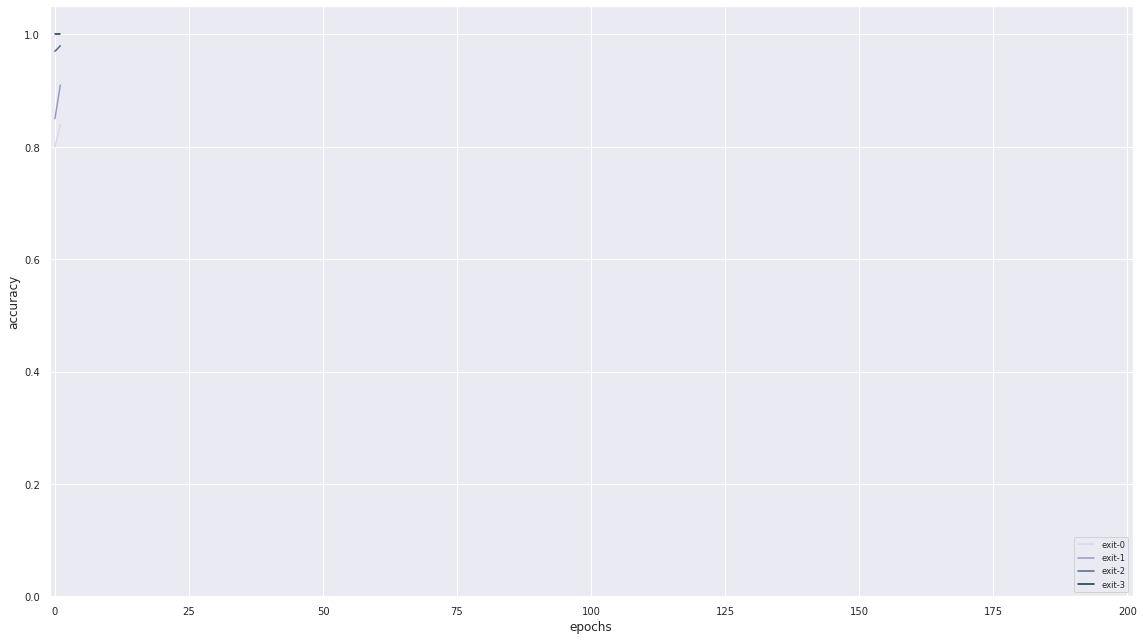

In [17]:
fig = plt.figure(figsize=(16,9))
ax = sns.lineplot(data=test_acc, 
                  palette="ch:2.5,.25", 
                  dashes=False)


plt.xlabel('epochs', fontsize='large')
plt.ylabel('accuracy', fontsize='large')
plt.tick_params(labelsize='medium')
plt.legend(legend, fontsize='small', loc='lower right')
plt.xlim([-1, 201])
plt.ylim([0, 1.05])
#plt.title('Test accuracy')
plt.tight_layout()
plt.savefig('BResNet_test_acc_VOC.png')
plt.show()

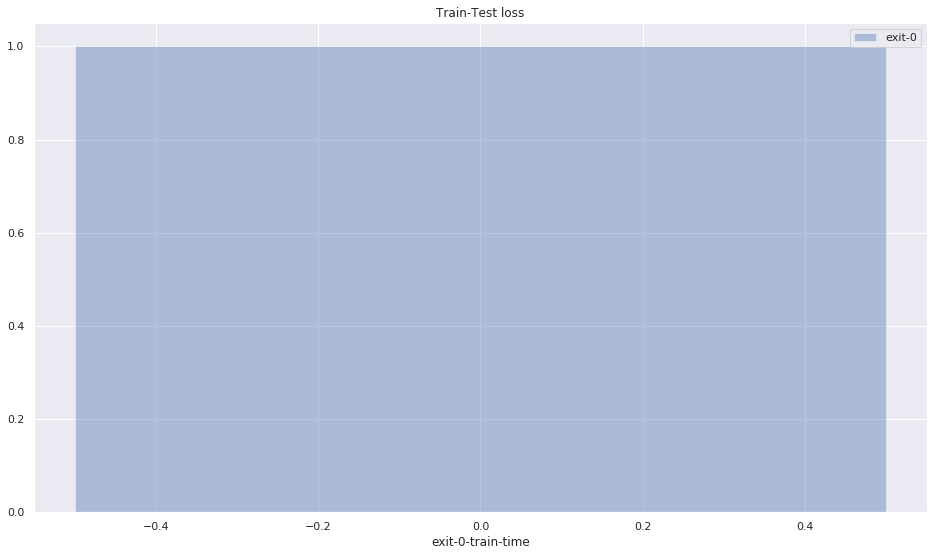

In [39]:
fig = plt.figure(figsize=(16,9))
sns.distplot(train_time[0])
#sns.distplot(train_time[1])
#ax1 = sns.lineplot(test_time)
#ax.set(xlabel='epochs', ylabel='loss')
plt.legend(legend)
plt.title('Train-Test loss')
plt.show()